In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM, GRU
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
#reading csv data
df_train = pd.read_csv("../../Kaggle_data/Santander_Satisfaction/train.csv" , index_col=[0])
#df_test = pd.read_csv("../../Kaggle_data/Santander_Satisfaction/train.csv", index_col=[0])

In [3]:
def rescale_data_for_classification(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    #TODO # scale all together
    scaler = scaler.fit(X)
    X = scaler.transform(X)
    return X

datetime.timedelta(0)

In [3]:
#classification between 1 and 0 (unsatisfied and satisfied)
df_train.TARGET.unique()

array([0, 1], dtype=int64)

In [4]:
df_train.shape

(76020, 370)

In [22]:
corr = df_train.corr()

In [23]:
#df_train.head().T

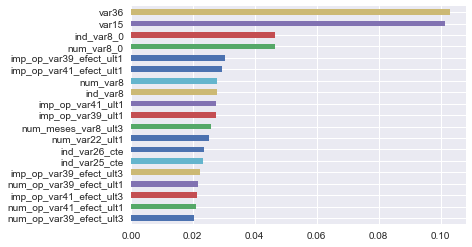

In [24]:
sns.set(font_scale = 1)
(abs(corr[corr.TARGET > 0.02])
 .TARGET
 .drop('TARGET')
 .sort_values()
 .plot
 .barh())

In [46]:

s  = corr[corr.TARGET > 0.02]
a = df_train["TARGET"]

In [15]:
#df of most relevent features
df_train_f = df_train[features]

In [ ]:
df_train_f_corr = df_train_f.corr()

In [89]:

cmap = sns.diverging_palette(5, 250, as_cmap=True)


df_train_f_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation of Features in San Juan")\
    .set_precision(2)\
    .set_table_styles(magnify())

,var15,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var8_0,ind_var8,ind_var25_cte,ind_var26_cte,num_var8_0,num_var8,var36,num_var22_ult1,num_meses_var8_ult3,num_op_var41_efect_ult1,num_op_var39_efect_ult1,num_op_var39_efect_ult3,TARGET
var15,1,0.085,0.075,0.1,0.085,0.075,0.11,0.11,0.1,0.08,0.094,0.11,0.1,-0.15,0.12,0.094,0.068,0.069,0.07,0.1
imp_op_var41_efect_ult1,0.085,1,0.81,0.89,1,0.81,0.88,0.18,0.19,0.19,0.19,0.18,0.19,-0.095,0.1,0.19,0.59,0.59,0.54,0.029
imp_op_var41_efect_ult3,0.075,0.81,1,0.72,0.81,1,0.72,0.15,0.17,0.16,0.16,0.15,0.17,-0.088,0.07,0.17,0.48,0.48,0.56,0.021
imp_op_var41_ult1,0.1,0.89,0.72,1,0.88,0.72,0.99,0.24,0.26,0.26,0.26,0.24,0.26,-0.15,0.14,0.25,0.63,0.63,0.58,0.028
imp_op_var39_efect_ult1,0.085,1,0.81,0.88,1,0.81,0.88,0.18,0.19,0.19,0.19,0.18,0.19,-0.095,0.1,0.19,0.59,0.6,0.54,0.03
imp_op_var39_efect_ult3,0.075,0.81,1,0.72,0.81,1,0.72,0.15,0.17,0.16,0.16,0.15,0.17,-0.088,0.072,0.17,0.48,0.49,0.56,0.022
imp_op_var39_ult1,0.11,0.88,0.72,0.99,0.88,0.72,1,0.24,0.26,0.26,0.26,0.24,0.26,-0.15,0.14,0.25,0.62,0.62,0.58,0.027
ind_var8_0,0.11,0.18,0.15,0.24,0.18,0.15,0.24,1,0.93,0.74,0.75,1,0.93,-0.078,0.1,0.87,0.26,0.26,0.25,0.047
ind_var8,0.1,0.19,0.17,0.26,0.19,0.17,0.26,0.93,1,0.78,0.8,0.93,1,-0.11,0.11,0.92,0.28,0.28,0.27,0.028
ind_var25_cte,0.08,0.19,0.16,0.26,0.19,0.16,0.26,0.74,0.78,1,0.98,0.74,0.78,-0.1,0.1,0.69,0.3,0.3,0.3,0.023


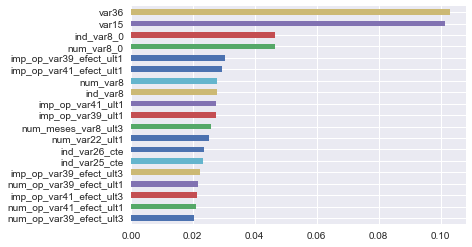

In [90]:
sns.set(font_scale = 1)
(abs(df_train_f_corr)
 .TARGET
 .drop('TARGET')
 .sort_values()
 .plot
 .barh())

In [ ]:
# Make an instance of the Model
pca = PCA(.99)
y = df_train['TARGET']
X = df_train.drop(columns=["TARGET"])
X = rescale_data_for_classification(X)

In [5]:
pca.fit(X)
X = pca.transform(X)

In [8]:
X.shape

(76020, 9)

In [ ]:
y.shape

In [9]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, random_state = 5)

In [ ]:
X_train_f.shape

In [42]:
y_train_pca.shape

(57015,)

In [36]:
rfc = RandomForestClassifier(n_estimators= 4, random_state=0)
#rfc.fit(X_train_pca, y_train_pca)
#rfc.score(X_test_pca, y_test_pca)

score = cross_val_score(rfc, X, y, cv=10)
score.mean()

0.9538016567848432

In [ ]:
#a = datetime.now()

knc = KNeighborsClassifier(n_neighbors=4)
#knc.fit(X_train_pca, y_train_pca)
#knc.score(X_test_pca, y_test_pca)

score = cross_val_score(knc, X, y, cv=10)
score.mean()
#b = datetime.now()
#c = b - a

In [ ]:
#a = datetime.now()

lsv = svm.SVC(kernel='linear', C = 1.0)
#sv.fit(X_train_pca, y_train_pca)
#sv.score(X_test_pca, y_test_pca)

score = cross_val_score(lsv, X, y, cv=10)
score.mean()
#b = datetime.now()
#e = b - a

In [ ]:
#a = datetime.now()

model = GaussianNB()
#model.fit(X_train_pca, y_train_pca)
#model.score(X_test_pca, y_test_pca)

#b = datetime.now()
#d = b - a

score = cross_val_score(model, X, y, cv=10)
score.mean()

In [9]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=X_train_pca.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
def create_model1():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=X_train_pca.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(5,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(3,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [54]:
def create_model2():
    x_size = X_train_pca.shape[1]
    y_size = 1
    model = Sequential()
    model.add(Dense(x_size, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    model.add(Dropout(0.2))
    model.add(Dense(int(x_size*2), activation="relu", kernel_initializer='normal',
    kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(int(x_size*.75), activation="relu", kernel_initializer='normal',
    kernel_regularizer=regularizers.l1_l2(1e-3), bias_regularizer=regularizers.l1_l2(1e-3)))
    model.add(Dropout(0.2))
    model.add(Dense(int(y_size*7), activation="relu", kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    return model

In [55]:
model = create_baseline()
history = model.fit(X_train_pca, y_train_pca, epochs=100, batch_size=75)
scores = model.evaluate(X_test_pca, y_test_pca)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))                       

Epoch 1/100
57015/57015 [==============================] - 1s 24us/step - loss: 0.2194 - acc: 0.9572
Epoch 2/100
57015/57015 [==============================] - 1s 14us/step - loss: 0.1693 - acc: 0.9596
Epoch 3/100
57015/57015 [==============================] - 1s 14us/step - loss: 0.1693 - acc: 0.9596
Epoch 4/100
57015/57015 [==============================] - 1s 14us/step - loss: 0.1694 - acc: 0.9596
Epoch 5/100
57015/57015 [==============================] - 1s 14us/step - loss: 0.1693 - acc: 0.9596
Epoch 6/100
57015/57015 [==============================] - 1s 15us/step - loss: 0.1694 - acc: 0.9596
Epoch 7/100
57015/57015 [==============================] - 1s 14us/step - loss: 0.1694 - acc: 0.9596
Epoch 8/100
57015/57015 [==============================] - 1s 14us/step - loss: 0.1693 - acc: 0.9596
Epoch 9/100
57015/57015 [==============================] - 1s 15us/step - loss: 0.1693 - acc: 0.9596
Epoch 10/100
57015/57015 [==============================] - 1s 15us/step - loss: 0.1693 - a

In [31]:
model = create_model1()
#history = model.fit(X_train_pca, y_train_pca, epochs=100, batch_size=75)
#scores = model.evaluate(X_test_pca, y_test_pca)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
score = cross_val_score(knc, X, y, cv=10)
score.mean()

0.9629044988161011

In [56]:
model = create_model2()
history = model.fit(X_train_pca, y_train_pca, epochs=100, batch_size=75)
scores = model.evaluate(X_test_pca, y_test_pca)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

Epoch 1/100
57015/57015 [==============================] - 2s 33us/step - loss: 0.2182 - acc: 0.9596
Epoch 2/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1752 - acc: 0.9596
Epoch 3/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1706 - acc: 0.9596
Epoch 4/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1698 - acc: 0.9596
Epoch 5/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1697 - acc: 0.9596
Epoch 6/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1696 - acc: 0.9596
Epoch 7/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1695 - acc: 0.9596
Epoch 8/100
57015/57015 [==============================] - 1s 20us/step - loss: 0.1694 - acc: 0.9596
Epoch 9/100
57015/57015 [==============================] - 1s 21us/step - loss: 0.1694 - acc: 0.9596
Epoch 10/100
57015/57015 [==============================] - 1s 19us/step - loss: 0.1693 - a

In [27]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 96.29%


In [14]:
sns.set(font_scale = 1)
(abs(corr[corr.TARGET > 0.02])
 .TARGET
 .drop('TARGET')
 .sort_values()
 .plot
 .barh())

In [8]:
d = {'Without PCA': [c.seconds], 'With PCA': [3]}

In [34]:
c.seconds

1

In [27]:
e.seconds

3

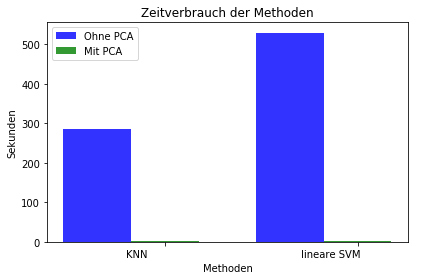

In [42]:
# data to plot
n_groups = 2
without_pca = (286, 529)
with_pca = (1, 3)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, without_pca, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ohne PCA')
 
rects2 = plt.bar(index + bar_width, with_pca, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Mit PCA')
 
plt.xlabel('Methoden')
plt.ylabel('Sekunden')
plt.title('Zeitverbrauch der Methoden')
plt.xticks(index + bar_width, ('KNN                  ', 'lineare SVM                 ')  )
plt.legend()


    
plt.tight_layout()
plt.show()

plt.savefig("Zeitverbrauch.png")

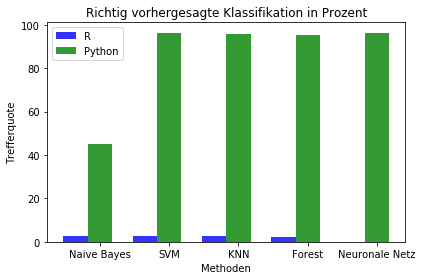

In [33]:
# data to plot
n_groups = 5
means_R = (2.52, 2.53, 2.49, 2.43, 0)
means_Python = (45.12, 96.29 ,95.87, 95.16, 96.29)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_R, bar_width,
                 alpha=opacity,
                 color='b',
                 label='R')
 
rects2 = plt.bar(index + bar_width, means_Python, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Python')
 
plt.xlabel('Methoden')
plt.ylabel('Trefferquote')
plt.title('Richtig vorhergesagte Klassifikation in Prozent')
plt.xticks(index + bar_width, ('Naive Bayes', 'SVM', 'KNN', 'Forest', 'Neuronale Netz')  )
plt.legend()
 
plt.tight_layout()
plt.show()

plt.savefig("ErgIQ.png")